In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
! pip install kaggle

In [3]:
! mkdir  ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!  chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

 99% 781M/788M [00:06<00:00, 152MB/s]
100% 788M/788M [00:06<00:00, 118MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/microsoft-catsvsdogs-dataset.zip', 'r')   #nazwa pliku z API command
zip_ref.extractall('/content/')
zip_ref.close()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import os
import PIL
from PIL import Image

import random
%matplotlib inline
import cv2
import datetime

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, Activation, BatchNormalization, ZeroPadding2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras import regularizers, optimizers
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,LearningRateScheduler,CSVLogger,LambdaCallback,TensorBoard
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19

import time
import glob
import matplotlib.image as matimage
import plotly.express as px


In [ ]:
! pip install rembg
import rembg

In [ ]:
!pip3 install livelossplot
from livelossplot import PlotLossesKeras

In [10]:
img = cv2.imread("PetImages/Dog/12499.jpg")
type(img)

numpy.ndarray

In [ ]:
img = cv2.imread("PetImages/Cat/12499.jpg")
type(img)

numpy.ndarray

In [ ]:
#img_folder_dog = r'PetImages/Dog/'

In [ ]:
#img_folder_cat = r'PetImages/Cat/'

In [ ]:
img_folder = r'PetImages/'

In [ ]:
def explore_class(class_name:str, nsamples:int):

    if nsamples%5 == 0:
        nrows = int(nsamples/5)
    else:
        nrows = int(nsamples//5 + 1)

    path = f'{img_folder}{class_name}'
    plt.figure(figsize=(20,3.5*nrows))
    plt.suptitle(f"Class: {class_name}, number of samples: {len(os.listdir(path))}")
    for i in range(nsamples):
        file = random.choice(os.listdir(path))
        image_path= os.path.join(path, file)
        img=cv2.imread(image_path)
        image_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        ax=plt.subplot(nrows,5,i+1)
        ax.title.set_text(file)

        plt.imshow(image_rgb)

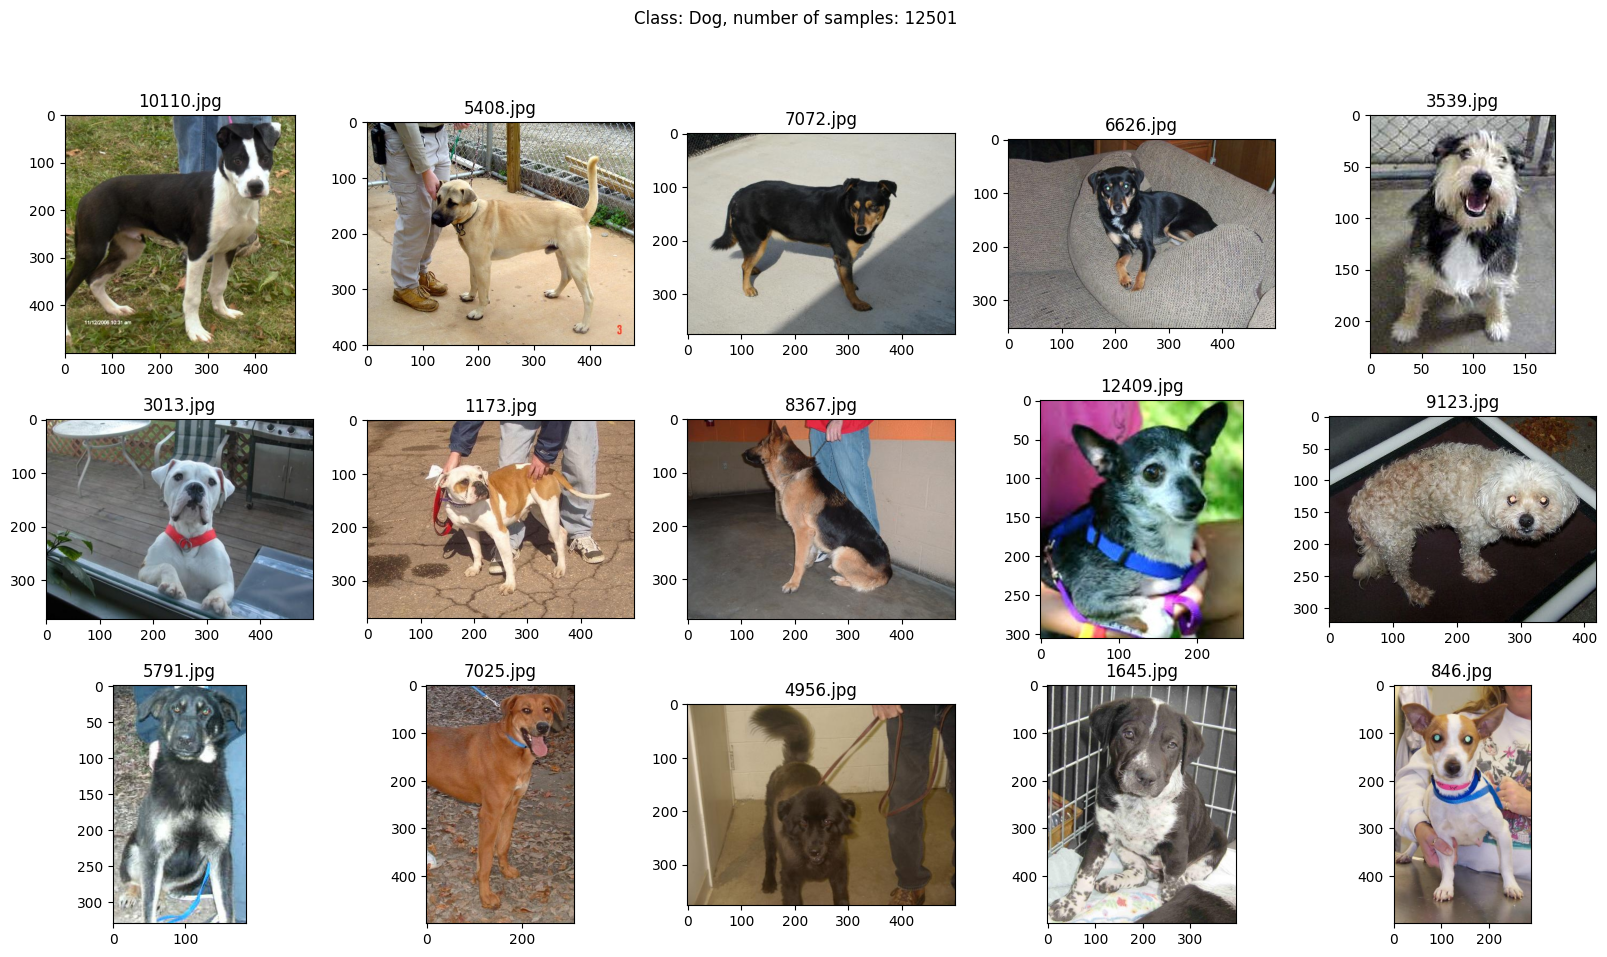

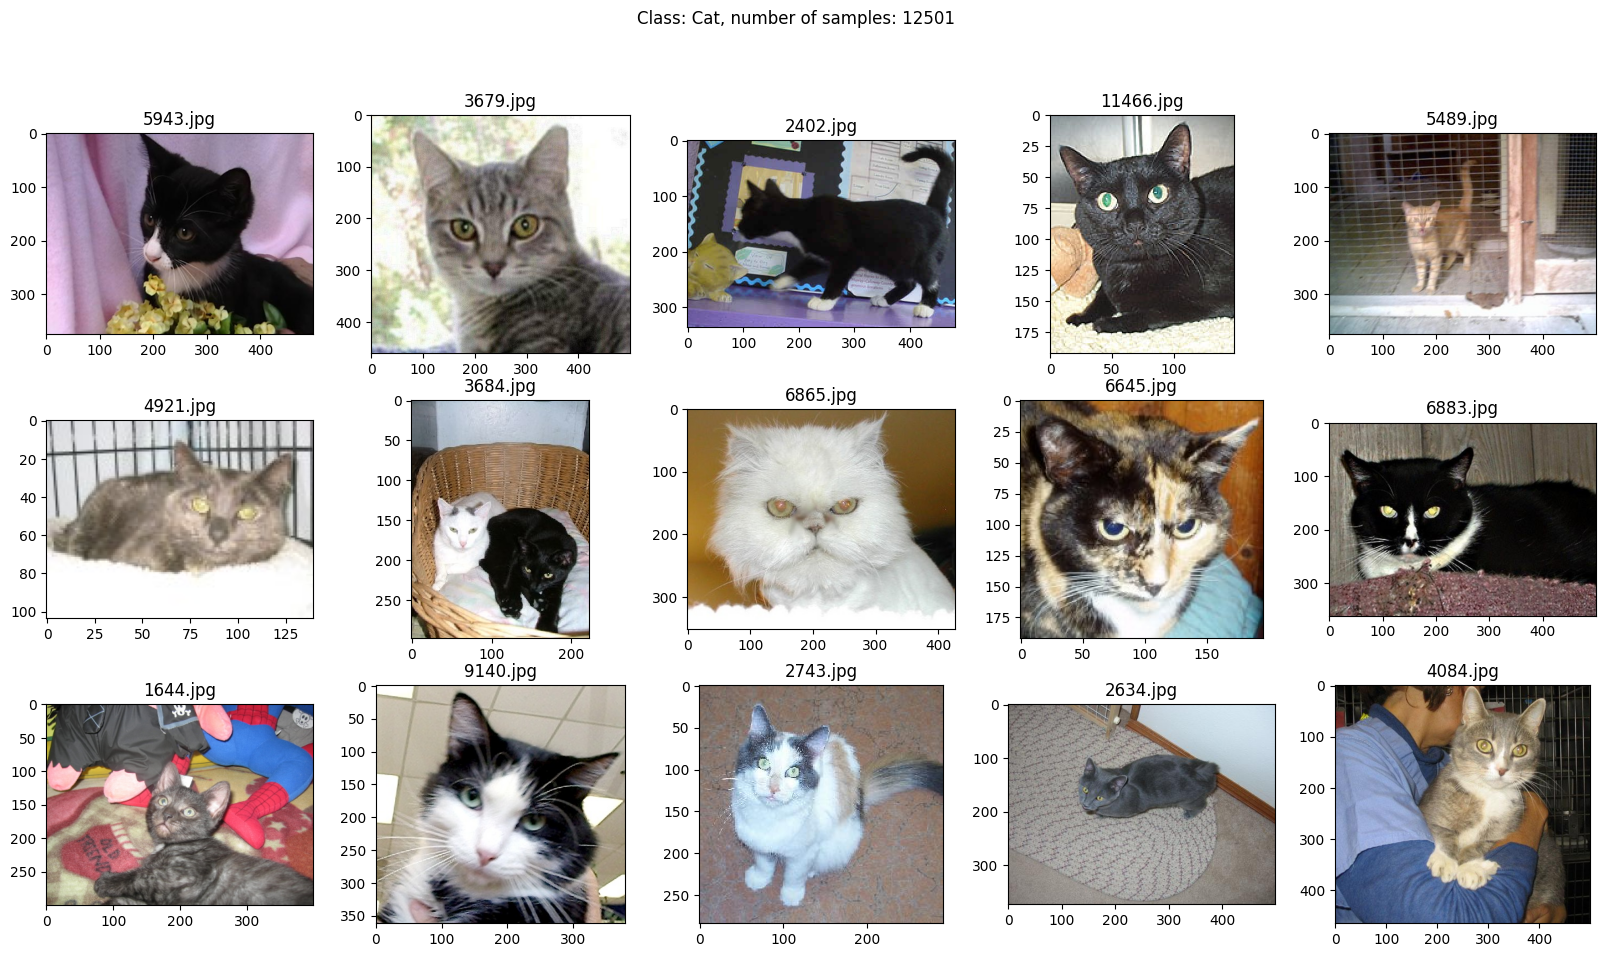

In [ ]:
explore_class('Dog',15)
explore_class('Cat',15)

In [ ]:
counter = {}

def count_size(img_folder,counter):

    for dir in os.listdir(img_folder):
        counter[dir]={}
        for file in os.listdir(os.path.join(img_folder, dir)):
            image_path= os.path.join(img_folder, dir,  file)
            image=cv2.imread(image_path)
            size = img.shape
            if size not in counter[dir]:
                counter[dir][size]=1
            else:
                counter[dir][size]+=1

In [ ]:
count_size(img_folder,counter)
counter

{'Cat': {(419, 408, 3): 12501}, 'Dog': {(419, 408, 3): 12501}}

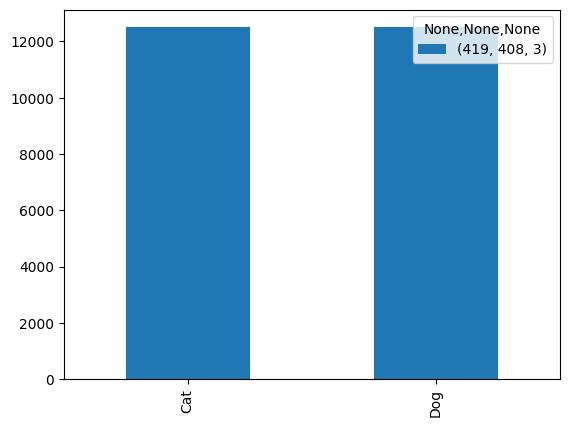

In [ ]:
df = pd.DataFrame.from_dict(counter, orient='index')
df.plot(kind='bar')
pass

In [11]:
SOURCE_PATH = '/content/PetImages'

# os.listdir returns a list containing all files under the given path
start = time.time()
CAT_PATH = os.listdir(os.path.join(SOURCE_PATH, 'Cat'))
DOG_PATH = os.listdir(os.path.join(SOURCE_PATH, 'Dog'))

CAT_PATH = list(map(lambda x : os.path.join(SOURCE_PATH+"/Cat", x), CAT_PATH))
DOG_PATH = list(map(lambda x : os.path.join(SOURCE_PATH+"/Dog", x), DOG_PATH))
end = time.time()

print(f"{len(CAT_PATH)} cats img")
print(f"{len(DOG_PATH)} dogs img")
print(f'\n{end-start} sec.')

12501 cats img
12501 dogs img

0.15065836906433105 sec.


In [12]:
df = pd.DataFrame({"path":CAT_PATH+DOG_PATH,"label":[0]*len(CAT_PATH)+[1]*len(DOG_PATH)})
df.head()

path  label
0  /content/PetImages/Cat/11475.jpg      0
1   /content/PetImages/Cat/9476.jpg      0
2   /content/PetImages/Cat/6854.jpg      0
3  /content/PetImages/Cat/11168.jpg      0
4   /content/PetImages/Cat/4172.jpg      0

In [ ]:
df.shape

(25002, 2)

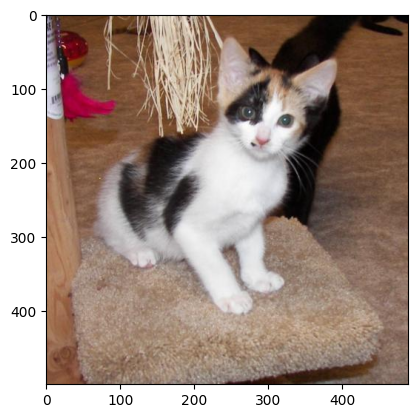

In [ ]:
img = cv2.cvtColor(cv2.imread(df.iloc[0,0]), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [13]:
def data_check():
    """
        check each image file for corrupted or missing
    """
    error = []
    start = time.time()
    for i in range(len(df)):
        try:                    # checks for corrupeted or missing image files
            if len(cv2.imread(df.iloc[i,0])) == 3:
                _ = 1
        except:
            print(i)
            error.append(df.iloc[i,0])
    end = time.time()
    print(f'\n{end-start} sec.')
    return error

In [14]:
remove = data_check()

372
2697
2833
3164
3793
3856
3951
4294
4669
4715
5165
5760
5980
6289
6931
7182
7738
7794
8265
8769
9255
10785
11876
11952
11965
12600
12710
12777
12811
13824
14016
14096
14718
14925
16289
17198
17620
17685
18064
18694
18703
18728
19027
19652
19927
19935
20217
20615
20766
21273
21526
21810
22673
22965
24043
24225

53.71766686439514 sec.


In [15]:
df = df[~df["path"].isin(remove)]

In [16]:
df

path  label
0      /content/PetImages/Cat/11475.jpg      0
1       /content/PetImages/Cat/9476.jpg      0
2       /content/PetImages/Cat/6854.jpg      0
3      /content/PetImages/Cat/11168.jpg      0
4       /content/PetImages/Cat/4172.jpg      0
...                                 ...    ...
24997  /content/PetImages/Dog/10985.jpg      1
24998   /content/PetImages/Dog/4687.jpg      1
24999   /content/PetImages/Dog/6172.jpg      1
25000    /content/PetImages/Dog/281.jpg      1
25001   /content/PetImages/Dog/4471.jpg      1

[24946 rows x 2 columns]

In [17]:
df['path'][12475:12477]

12500     /content/PetImages/Cat/4471.jpg
12501    /content/PetImages/Dog/11475.jpg
Name: path, dtype: object

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['path'][11475:13477], df['label'][11475:13477], test_size=0.1, random_state=42)

df_train = pd.DataFrame({"path":X_train,"label":y_train})
df_test = pd.DataFrame({"path":X_test,"label":y_test})

df_train['label'] = df_train['label'].astype(str)
df_test['label'] = df_test['label'].astype(str)


In [19]:
train_datagen = ImageDataGenerator(rescale=1 / 255.0, validation_split=0.20)

In [20]:
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [21]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 100
batch_size = 32

==============================

In [ ]:
train_datagen_2 = ImageDataGenerator(
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

Found 1 validated image filenames belonging to 1 classes.


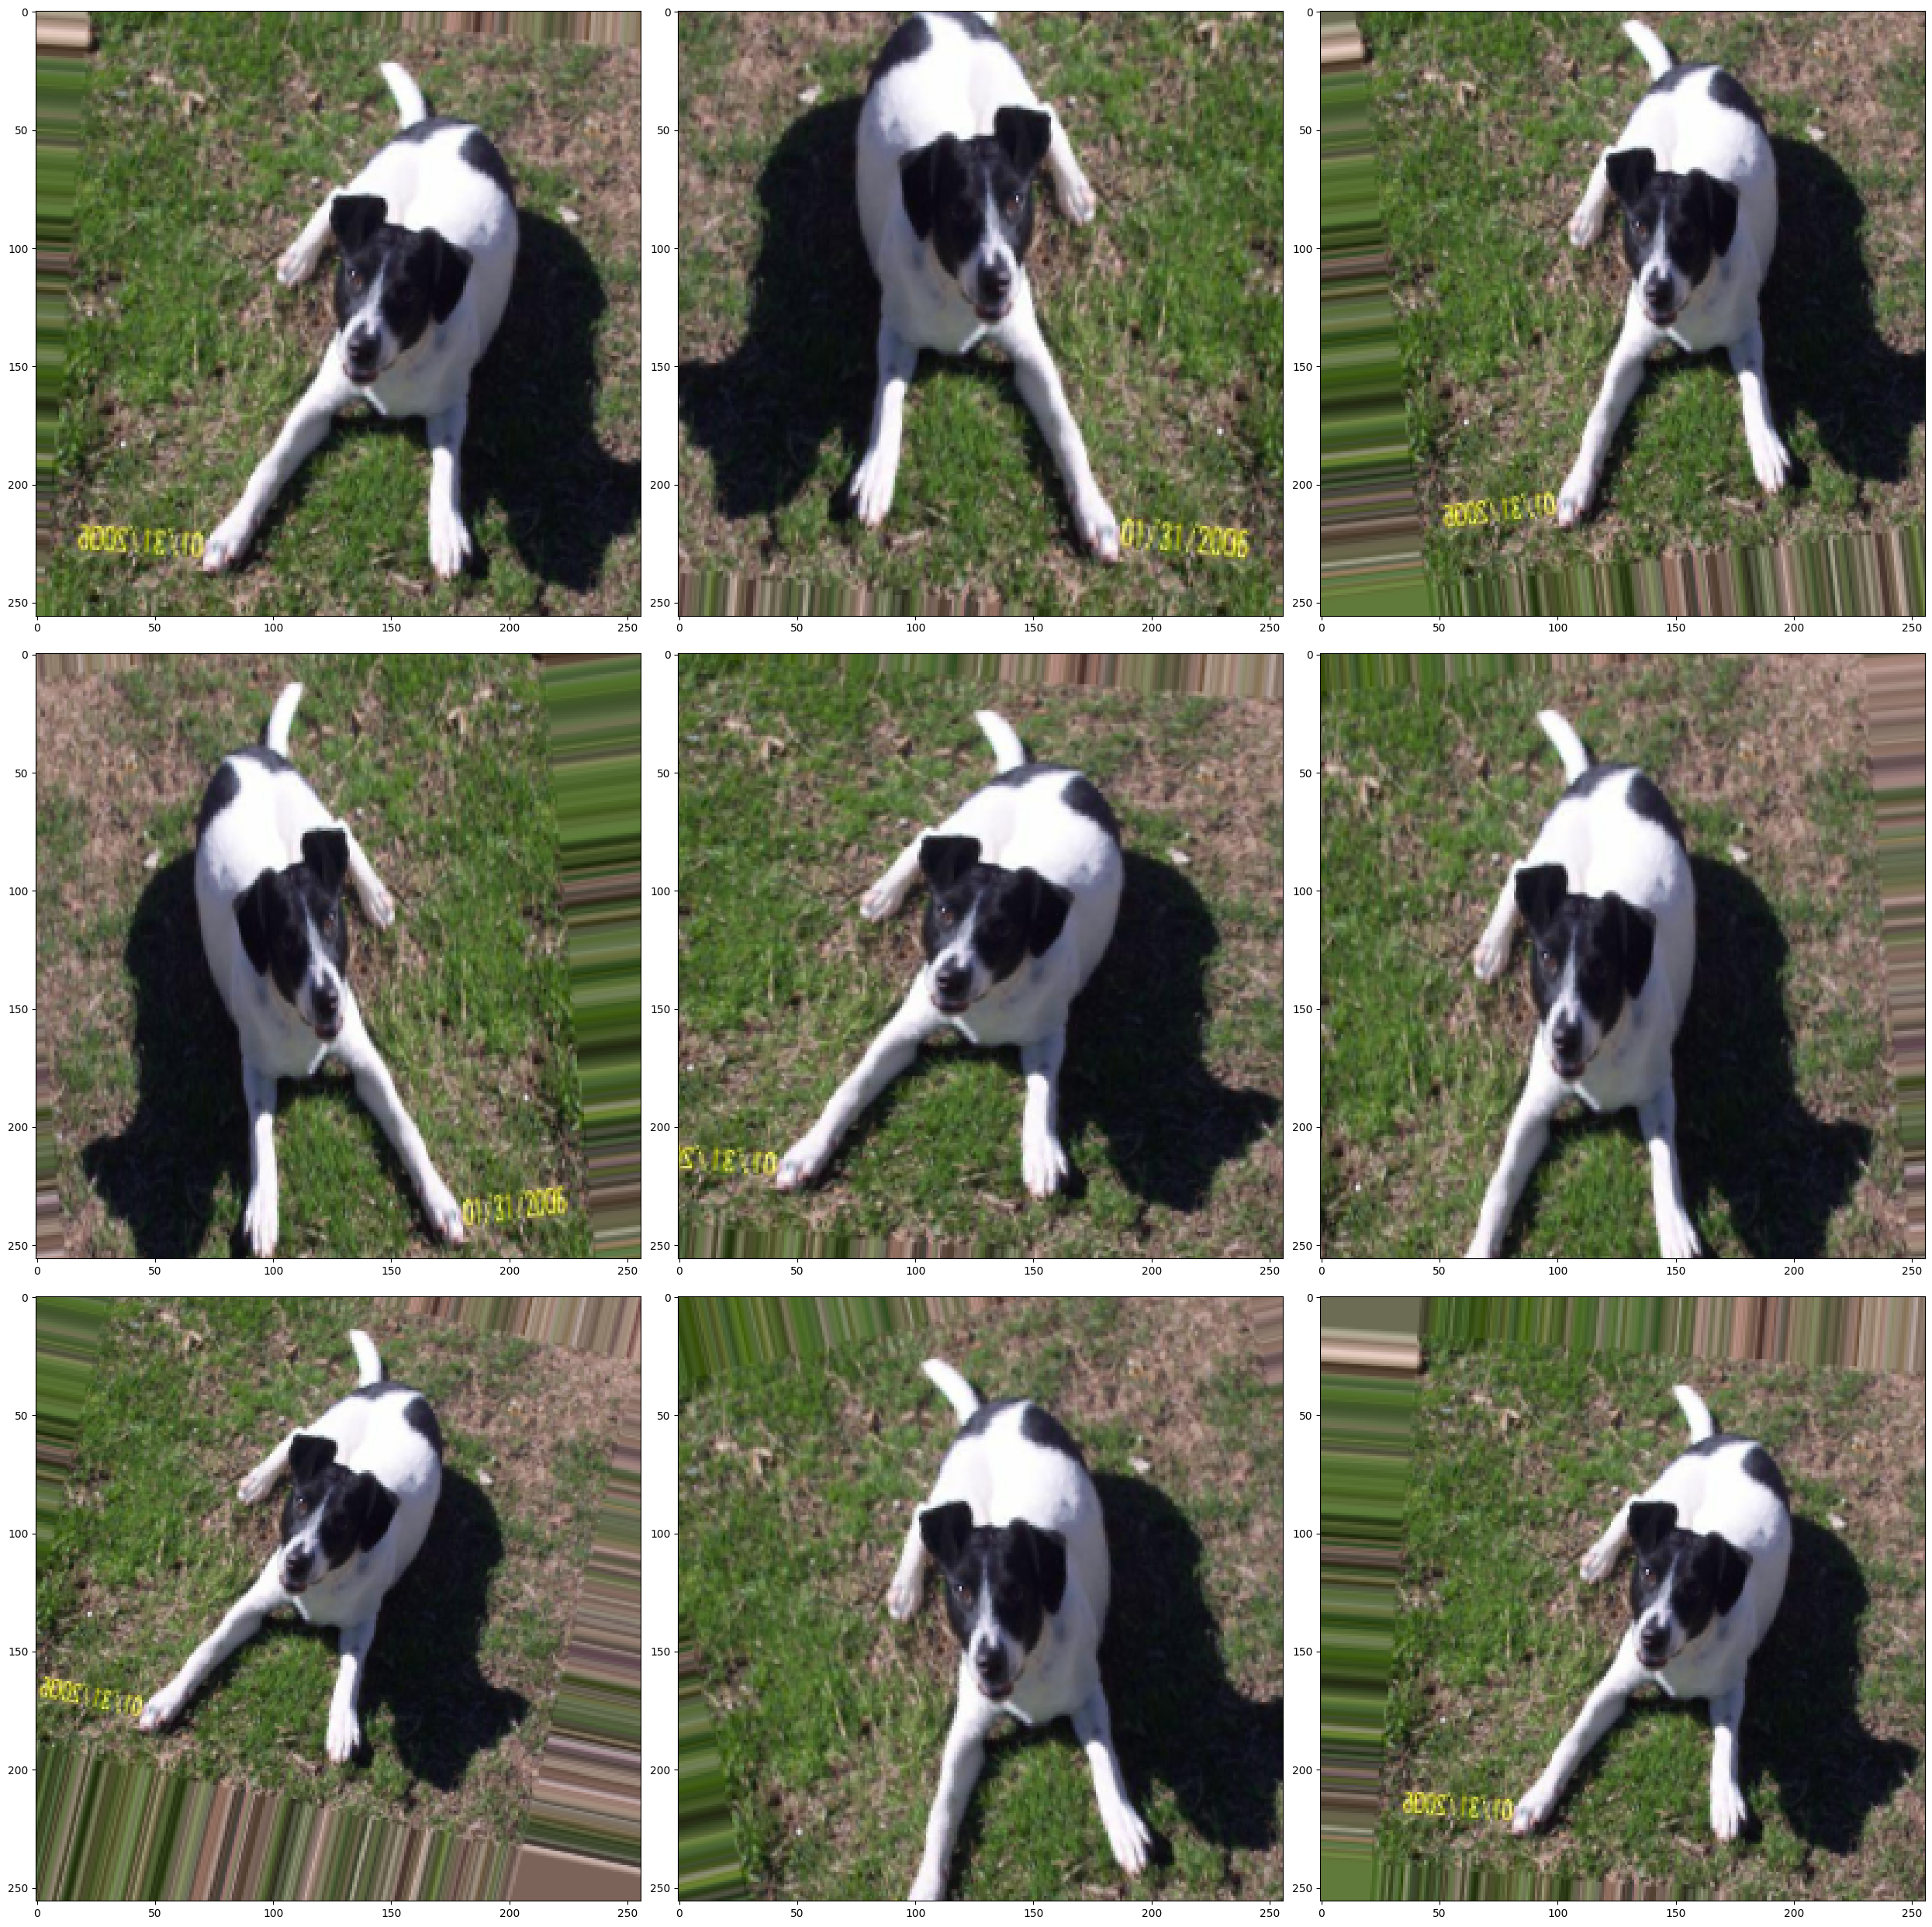

In [ ]:
df_img_example = df_train.sample(n=1).reset_index(drop=True)
df_example_generator = train_datagen_2.flow_from_dataframe(
    df_img_example,
    directory=None,
    x_col='path',
    y_col='label',
    class_mode='categorical'
)
plt.figure(figsize=(25, 25))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in df_example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

================================================

Train Generator

In [22]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=None,
    x_col="path",
    y_col="label",
    target_size=(image_size, image_size),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 1441 validated image filenames belonging to 2 classes.


Validation Generator

In [23]:
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=None,
    x_col="path",
    y_col="label",
    target_size=(image_size, image_size),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 360 validated image filenames belonging to 2 classes.


Test Generator

In [24]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=None,
    x_col="path",
    y_col="label",
    target_size=(image_size, image_size),
    color_mode="rgb",
    class_mode=None,
    batch_size=1,
    shuffle=False,
    seed=42
)

Found 201 validated image filenames.


**Model VGG-16**

In [25]:
model_vgg_16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_vgg_16.summary()

In [26]:
#will not train
for layer in model_vgg_16.layers:
  layer.trainable = False

In [27]:
x = Flatten()(model_vgg_16.output)
predict = Dense(2, activation = 'sigmoid') (x)
final_model_vgg_16 = Model(inputs = model_vgg_16.input, outputs = predict)

In [28]:
final_model_vgg_16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#plot_model(model = final_model_vgg_16, show_shapes = True)

In [ ]:
#checkpoint = ModelCheckpoint("vgg16_1.h5",
#                             save_best_only=True,
#                             verbose=1, )

In [29]:
es_callback = keras.callbacks.EarlyStopping(patience=15)

In [33]:
final_model_vgg_16.compile(loss="binary_crossentropy",
                      optimizer=Adam(learning_rate=0.001),
                      metrics=['accuracy'])

In [34]:
train_steps_size = train_generator.n//train_generator.batch_size
validation_steps_size = valid_generator.n//valid_generator.batch_size

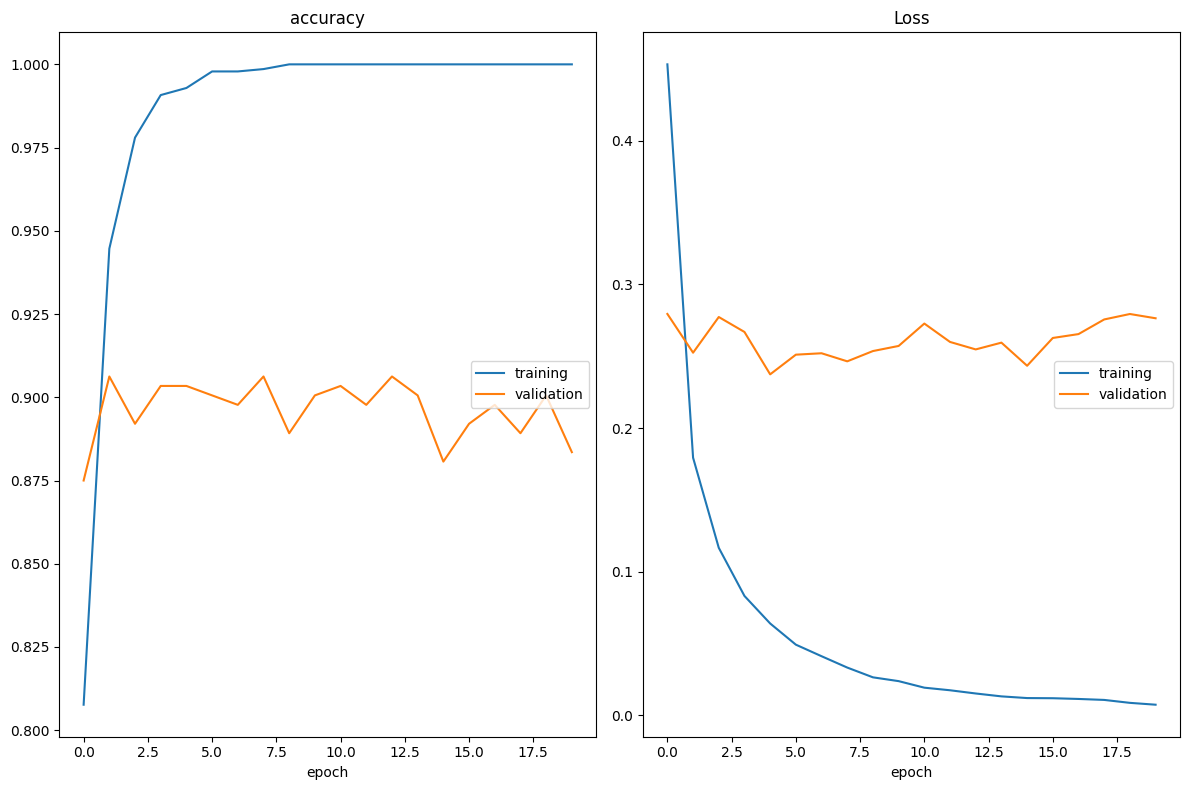

accuracy
	training         	 (min:    0.808, max:    1.000, cur:    1.000)
	validation       	 (min:    0.875, max:    0.906, cur:    0.884)
Loss
	training         	 (min:    0.007, max:    0.453, cur:    0.007)
	validation       	 (min:    0.237, max:    0.279, cur:    0.276)
45/45 [==============================] - 10s 221ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.2765 - val_accuracy: 0.8835


In [35]:
history = final_model_vgg_16.fit_generator(train_generator,
                                          validation_data = valid_generator,
                                          steps_per_epoch = train_steps_size,
                                          validation_steps = validation_steps_size,
                                          epochs=epochs,
                                          callbacks=[es_callback, PlotLossesKeras()]
                                          )

In [36]:
final_model_vgg_16.save('model_vgg_16.h5')

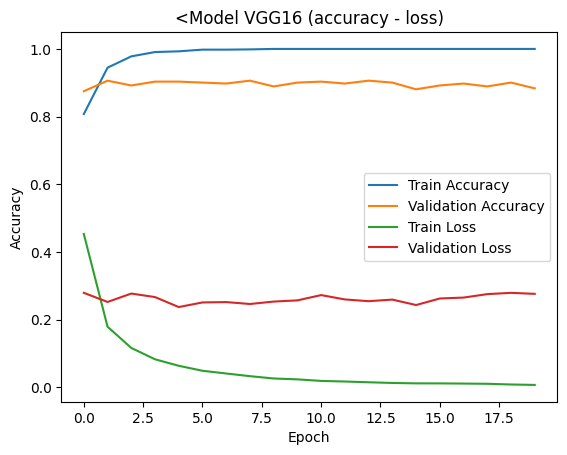

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("<Model VGG16 (accuracy - loss)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Validation Accuracy","Train Loss","Validation Loss"])
plt.show()

Model Evaluation

In [41]:
final_model_vgg_16.evaluate_generator(generator=valid_generator, steps=validation_steps_size)

<ipython-input-41-64fae50ef356>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  final_model_vgg_16.evaluate_generator(generator=valid_generator, steps=validation_steps_size)


[0.2805122435092926, 0.8806818127632141]

Test Model

1/1 [==============================] - 0s 207ms/step
This is a dog


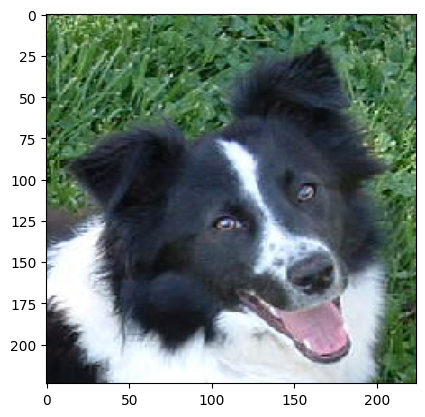

In [54]:
from tensorflow.keras.preprocessing import image
img = image.load_img("PetImages/Dog/12494.jpg", target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("model_vgg_16.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("This is a cat")
else:
    print('This is a dog')

Predict the output

In [57]:
test_step_size = test_generator.n//test_generator.batch_size

test_generator.reset()
pred=final_model_vgg_16.predict_generator(test_generator, steps=test_step_size, verbose=1)

  9/201 [>.............................] - ETA: 2s

<ipython-input-57-eac0d1e03602>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=final_model_vgg_16.predict_generator(test_generator, steps=test_step_size, verbose=1)


201/201 [==============================] - 3s 12ms/step


In [ ]:
#predict = pred
#threshold = 0.5
#test_model['label'] = np.where(predict > threshold, 1,0)

In [59]:
predicted_class_indices=np.argmax(pred, axis=1)

In [60]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [68]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [69]:
results['Predictions'] = results['Predictions'].astype(int)

In [70]:
results.to_csv("results.csv",index=False)

In [71]:
results

Filename  Predictions
0       /content/PetImages/Dog/58.jpg            1
1     /content/PetImages/Cat/2042.jpg            0
2     /content/PetImages/Dog/9068.jpg            1
3     /content/PetImages/Cat/6960.jpg            0
4     /content/PetImages/Dog/2157.jpg            1
..                                ...          ...
196  /content/PetImages/Dog/12368.jpg            1
197    /content/PetImages/Dog/239.jpg            0
198  /content/PetImages/Cat/11136.jpg            0
199   /content/PetImages/Cat/3749.jpg            0
200   /content/PetImages/Dog/5579.jpg            1

[201 rows x 2 columns]

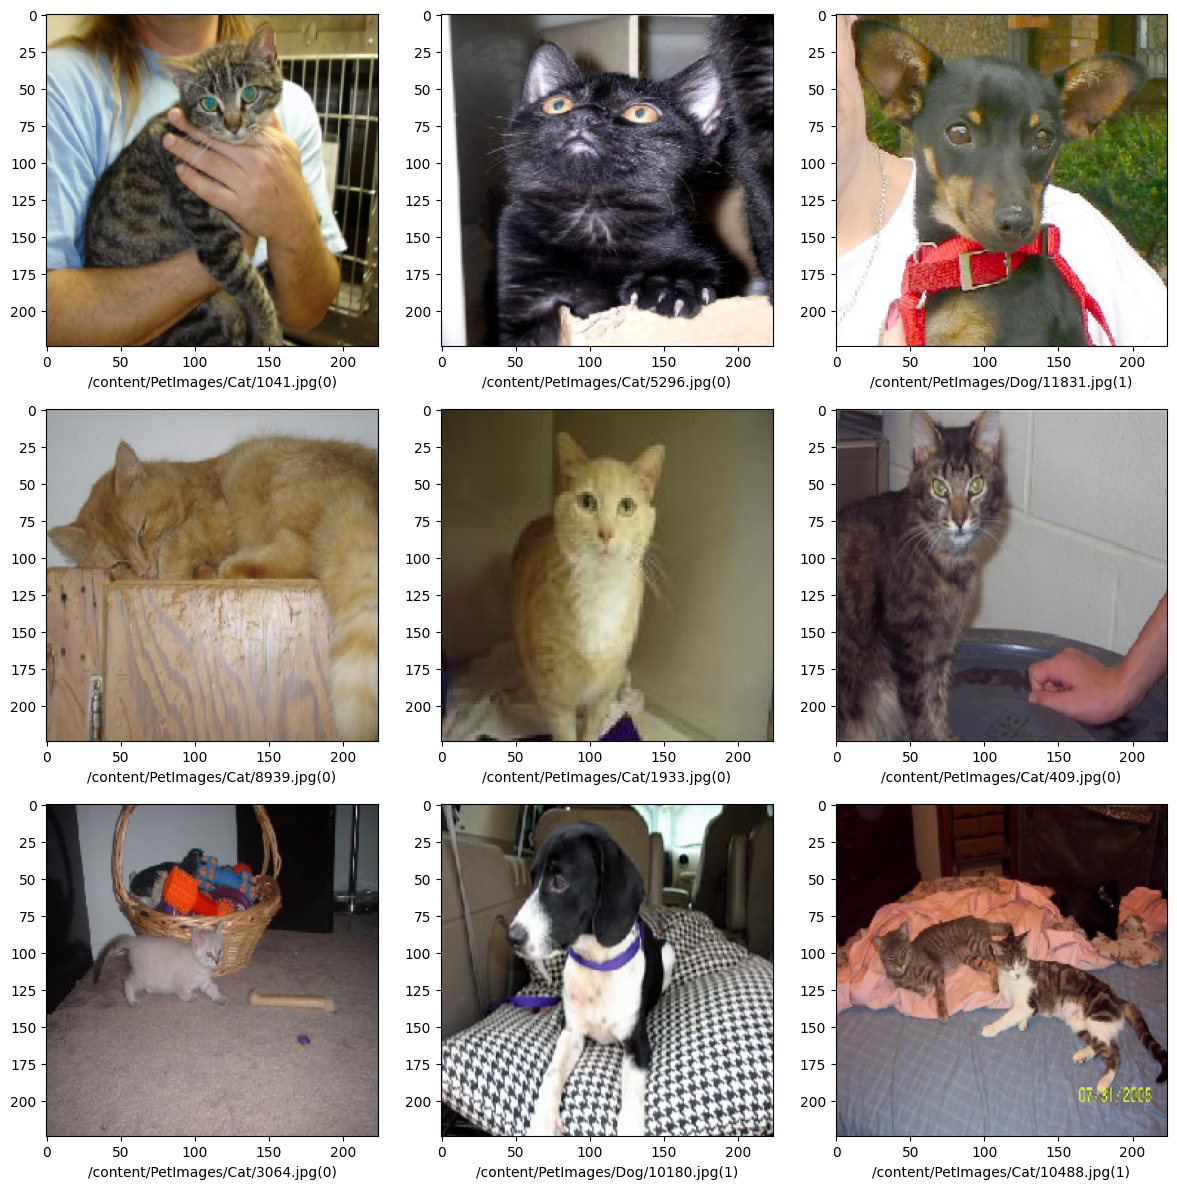

In [81]:
sample_test = results.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['Filename']
    category = row['Predictions']
    img = image.load_img(""+filename, target_size=(image_size, image_size))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()